In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
train_t= pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/train_transaction.csv')
train_i = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/train_identity.csv')

test_t= pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/test_transaction.csv')
test_i = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/test_identity.csv')
submission = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/sample_submission.csv')

In [53]:
# C column check
cl = list(train_t.columns[train_t.columns.str.contains('C')==True].values)
cl.pop(0)
cl.append('isFraud')

In [54]:
tc = train_t.loc[:,cl]

In [40]:
tc.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,isFraud
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215,0.034990
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262,0.183755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000,0.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000,1.000000


array([[<AxesSubplot:title={'center':'C1'}>,
        <AxesSubplot:title={'center':'C2'}>,
        <AxesSubplot:title={'center':'C3'}>,
        <AxesSubplot:title={'center':'C4'}>],
       [<AxesSubplot:title={'center':'C5'}>,
        <AxesSubplot:title={'center':'C6'}>,
        <AxesSubplot:title={'center':'C7'}>,
        <AxesSubplot:title={'center':'C8'}>],
       [<AxesSubplot:title={'center':'C9'}>,
        <AxesSubplot:title={'center':'C10'}>,
        <AxesSubplot:title={'center':'C11'}>,
        <AxesSubplot:title={'center':'C12'}>],
       [<AxesSubplot:title={'center':'C13'}>,
        <AxesSubplot:title={'center':'C14'}>,
        <AxesSubplot:title={'center':'isFraud'}>, <AxesSubplot:>]],
      dtype=object)

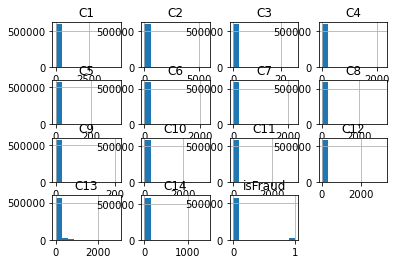

In [42]:
tc.hist()

/Users/krc/miniforge3/envs/krc2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C1', ylabel='Density'>

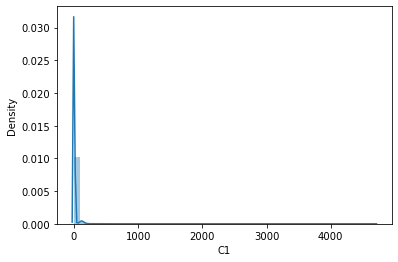

In [56]:
sns.distplot(tc.C1)

In [81]:
col_set = set([])
for i in tc.columns[:-1]:
    fenc = tc[i].quantile(.75) + (3 * (tc[i].quantile(.75) - tc[i].quantile(.25)))
    print(i,":",fenc)
    print(len(tc[i][tc[i].values > fenc]))
    col_set.update(list(tc[i][tc[i].values > fenc].index))
print(len(col_set))


C1 : 9.0
43588
C2 : 9.0
45977
C3 : 0.0
2429
C4 : 0.0
138657
C5 : 4.0
40429
C6 : 5.0
50337
C7 : 0.0
67398
C8 : 0.0
142873
C9 : 8.0
30792
C10 : 0.0
137098
C11 : 5.0
48821
C12 : 0.0
101341
C13 : 45.0
50055
C14 : 5.0
55045
247058


In [59]:
tc.C1[tc.C1.values > 6]

21        127.0
36          8.0
37         92.0
45        190.0
52          8.0
          ...  
590458     12.0
590467    105.0
590473    169.0
590487     66.0
590515      9.0
Name: C1, Length: 59535, dtype: float64

<AxesSubplot:>

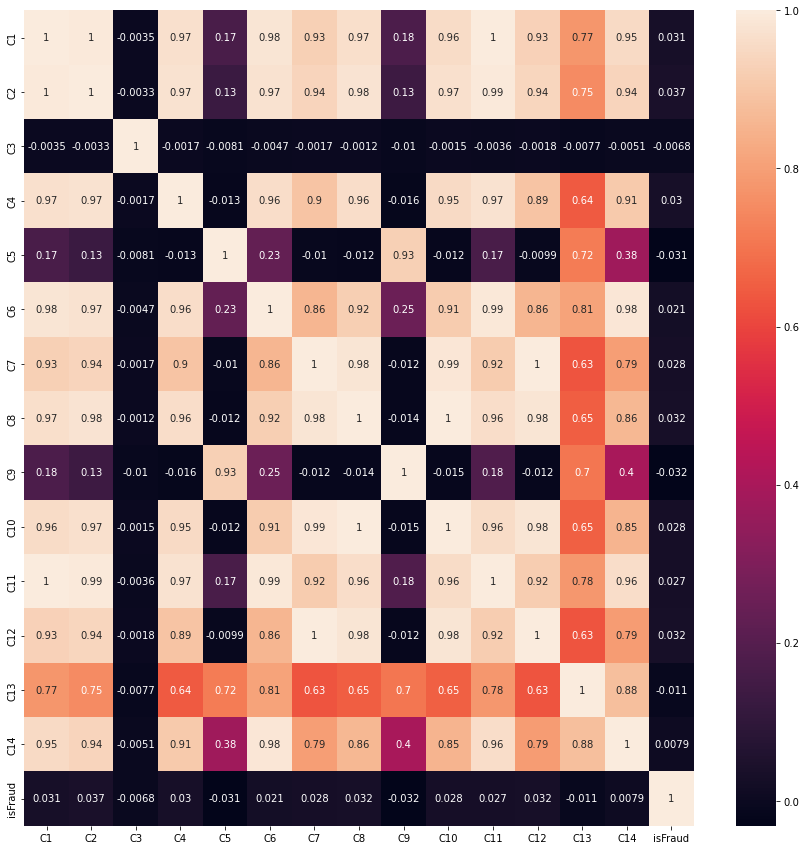

In [86]:
plt.figure(figsize=(15,15))
sns.heatmap(tc.corr(),annot=True)

In [88]:
dd = train_t.D1.fillna(train_t.D2)

In [91]:
train_t.D1.isnull().sum()

1269

1269